문제 정의 : 전국에서 신도림동의 연령별 인구 구조와 가장 형태가 비슷한 지역은 어디일까?

<알고리즘 설계> <br>
1. 데이터를 읽어온다.
2. 궁금한 지역의 이름을 입력 받는다.
3. 궁금한 지역의 인구 구조를 저장한다.
4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화 한다.


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


1. 데이터를 읽어온다.

In [7]:
import csv
import matplotlib.pyplot as plt

f = open('age.csv')
data = csv.reader(f)
next(data)

for row in data :
  print(row)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
import csv
import matplotlib.pyplot as plt

f = open('age.csv')
data = csv.reader(f)
next(data)

home = [] # 입력 받은 지역의 데이터를 저장할 리스트
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

for row in data :
  if name in row[0] :
    for i in row[3:] :
      home.append(int(i))
print(home)

UnicodeDecodeError: ignored

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림동


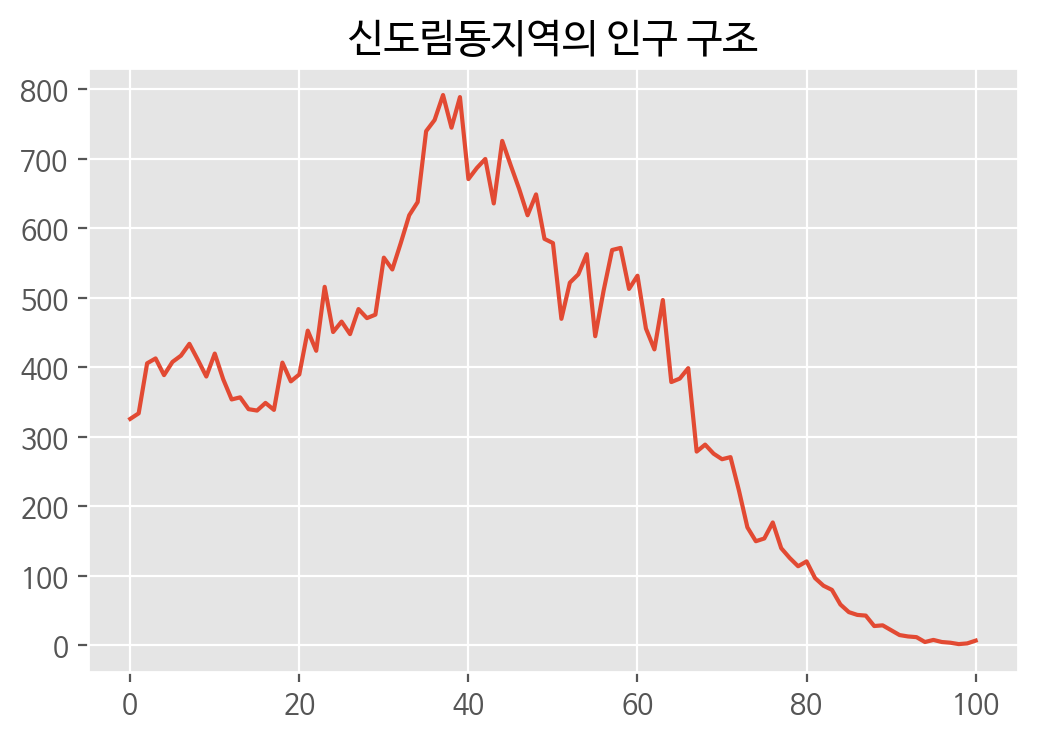

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np


f = open('age.csv')
data = csv.reader(f)
next(data)

home = [] # 입력 받은 지역의 데이터를 저장할 리스트
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')


for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) # 넘파이 배열로 저장할 때 int로 변환

plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + '지역의 인구 구조')
plt.plot(home)
plt.show()

4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.


*   전국의 모든 지역 중 한곳 (B)을 선택 한다.
*   궁금한 지역 A의 0세 인구수에서 B의 0세 인구수를 뺀다
*   100세 이상 인구수에 해당 하는 값까지 반복한 후 각각의 차이를 모두 더한다.
*   전국의 모든 지역에 대해 반복하며, 그 차이가 가장 작은 지역을 찾는다.


궁금한 지역 A의 0세 인구 비율에서 B의 0세 인구 비율을 뺀다.

In [10]:
import csv
import matplotlib.pyplot as plt
import numpy as np


f = open('age.csv')
data = csv.reader(f)
next(data)

data = list(data) # 원본 데이터를 리스트로

home = [] # 입력 받은 지역의 데이터를 저장할 리스트
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')


for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환

for row in data :
  away = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환
  print(np.sum(home-away)) # sum()함수로 각각의 차이 모두 더함

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림동
5.9631119486702744e-18
1.2793585635328952e-17
1.2576745200831851e-17
5.421010862427522e-18
6.938893903907228e-18
-9.432558900623889e-18
3.2959746043559335e-17
-6.071532165918825e-18
1.3010426069826053e-18
-2.8406096919120216e-17
3.469446951953614e-18
1.3444106938820255e-17
4.553649124439119e-18
3.2526065174565133e-18
4.7704895589362195e-18
-8.456776945386935e-18
-2.8189256484623115e-18
1.0842021724855044e-17
-1.3010426069826053e-18
1.951563910473908e-18
-1.474514954580286e-17
8.673617379884035e-18
9.107298248878237e-18
9.107298248878237e-18
-6.505213034913027e-19
1.3010426069826053e-18
3.2959746043559335e-17
-1.5612511283791264e-17
-2.1358782797964437e-17
-3.903127820947816e-18
-2.8731357570865868e-18
3.469446951953614e-18
-3.903127820947816e-18
1.2902005852577503e-17
-8.673617379884035e-18
5.854691731421724e-18
-4.9873299934333204e-18
-1.3660947373317356e-17
1.1275702593849246e-17
-5.421010862427522e-18
-3.686287386450715e-18
6.50521303491302

전국의 모든 지역에 대해 반복하여 그 차이가 가장 작은 지역을 찾고 시각화


인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림동


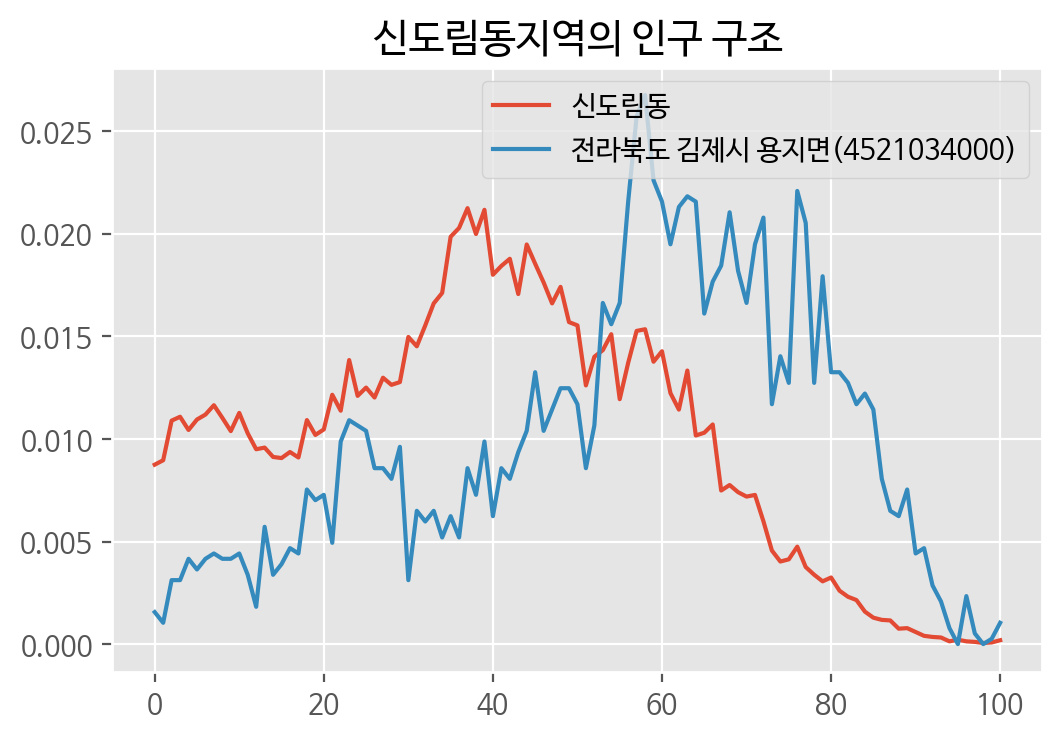

In [14]:
import csv
import matplotlib.pyplot as plt
import numpy as np


f = open('age.csv')
data = csv.reader(f)
next(data)

data = list(data) # 원본 데이터를 리스트로

home = [] # 입력 받은 지역의 데이터를 저장할 리스트
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 0 #최솟값을 저장할 변수 생성 및 초기화
result_name = '' #최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result = 0 # 최소값을 갖는 지역의 연령대별 인구비율 저장할 변수 생성 및 초기화

for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환

for row in data :
  away = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환
  s = np.sum(home-away) #**2) # 거듭제곱으로 음수를 양수로 해버리면 또 문제
  if result_name == '' or s < mn :
    mn = s
    result_name = row[0]
    result = away # 비교된 인구 비율 저장 
    
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + '지역의 인구 구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()
# 근데 너무 이상함. 왜 그럴까?? >> 음수 값도 나와버림

우리가 찾고 있었던 것은 인구 구조가 가장 비슷한 지역 -> 즉 연령대별 인구 비율과 분포가 비슷해야 함<br>
두 지역의 차이가 합한 값이 0에 가까울 수록 인구 구조가 비슷 -> 음수 값이 선택됨<br>
거듭제곱 연산자를 통해 음수를 양수로 변환 처리 추가

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 신도림동


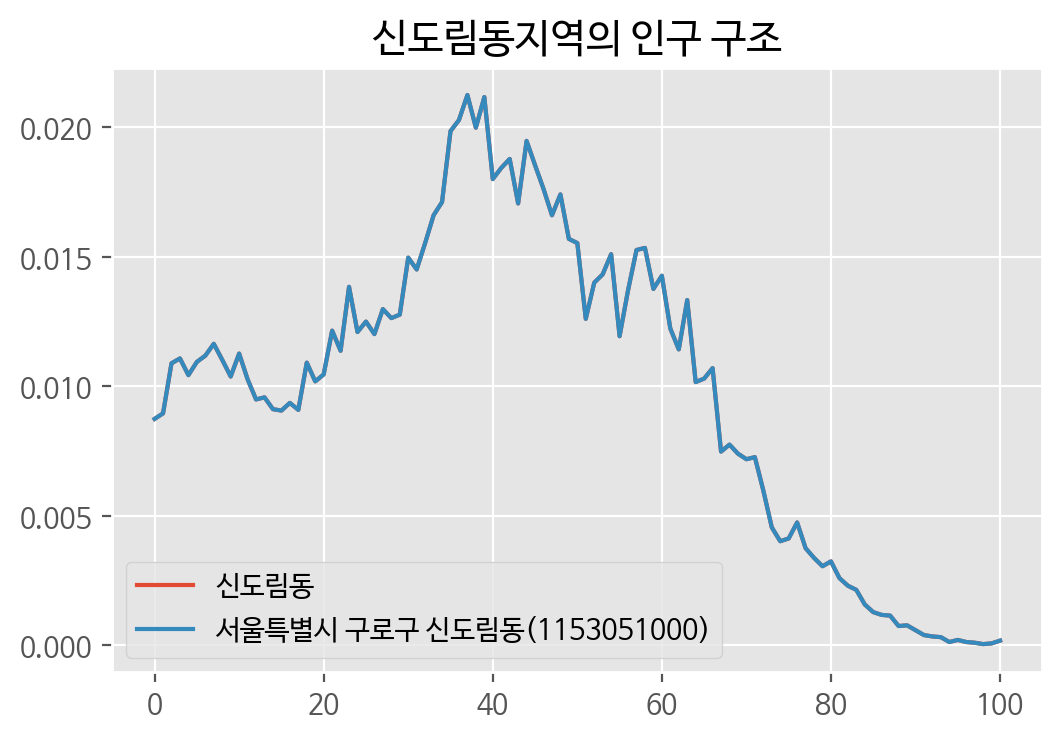

In [15]:
import csv
import matplotlib.pyplot as plt
import numpy as np


f = open('age.csv')
data = csv.reader(f)
next(data)

data = list(data) # 원본 데이터를 리스트로

home = [] # 입력 받은 지역의 데이터를 저장할 리스트
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 0 #최솟값을 저장할 변수 생성 및 초기화
result_name = '' #최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result = 0 # 최소값을 갖는 지역의 연령대별 인구비율 저장할 변수 생성 및 초기화

for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환

for row in data :
  away = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환
  s = np.sum((home-away)**2) # 거듭제곱으로 음수를 양수로 해버리면 또 문제
  if result_name == '' or s < mn :
    mn = s
    result_name = row[0]
    result = away # 비교된 인구 비율 저장 
    
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + '지역의 인구 구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()
# 이번엔 똑같이 나와버림

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 고양시


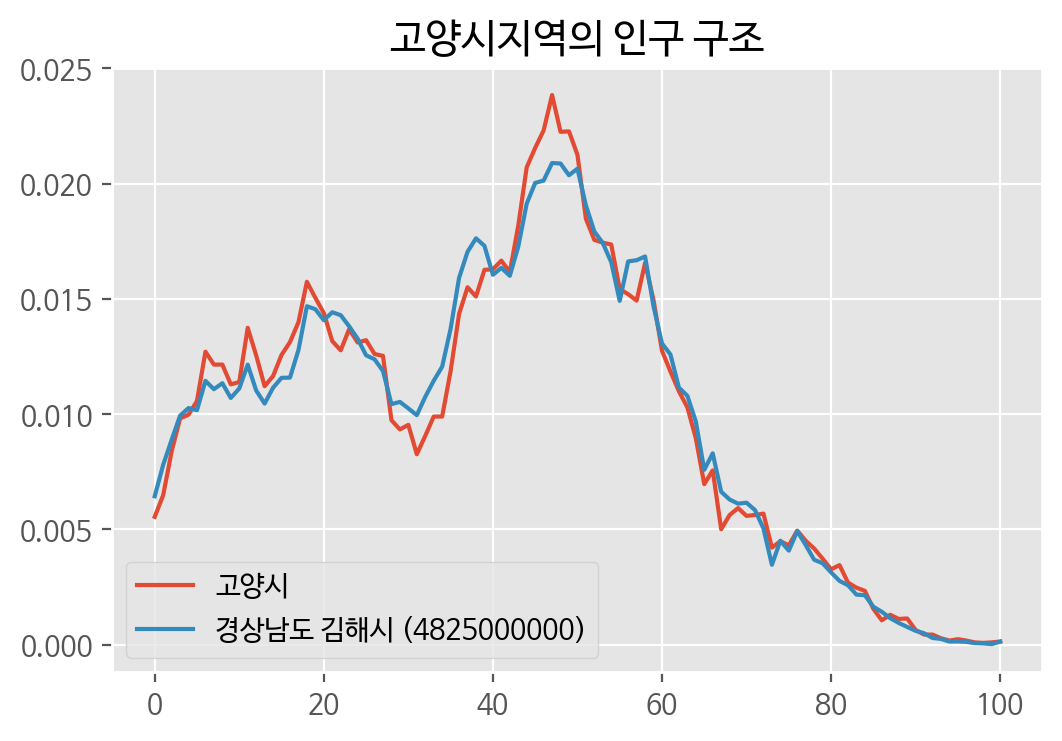

In [43]:
import csv
import matplotlib.pyplot as plt
import numpy as np


f = open('age.csv')
data = csv.reader(f)
next(data)

data = list(data) # 원본 데이터를 리스트로

home = [] # 입력 받은 지역의 데이터를 저장할 리스트
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 0 #최솟값을 저장할 변수 생성 및 초기화
result_name = '' #최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result = 0 # 최소값을 갖는 지역의 연령대별 인구비율 저장할 변수 생성 및 초기화

for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환

for row in data :
  away = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환
  s = np.sum((home-away)**2) # 거듭제곱으로 양수로 변환
  if (result_name == '' or s < mn) and s != 0:
    mn = s
    result_name = row[0]
    result = away # 비교된 인구 비율 저장 
    
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + '지역의 인구 구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

# 거듭제곱으로 보는 것이 차이를 증폭시켜서 더 확실히 비교 가능

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 고양시


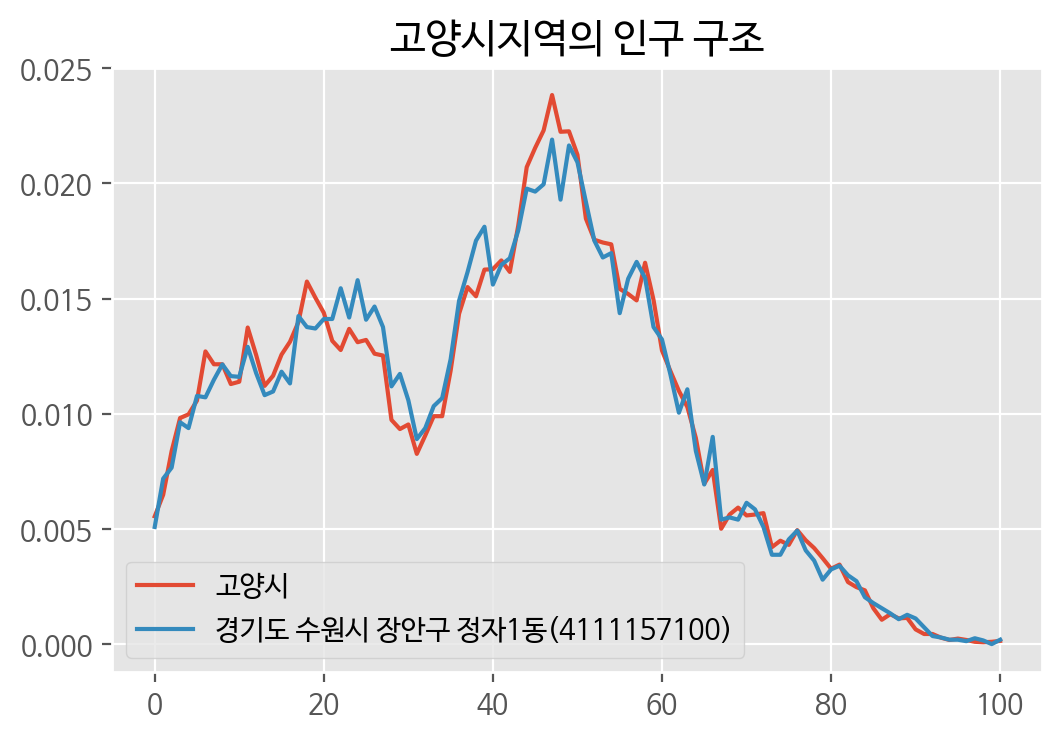

In [42]:
import csv
import matplotlib.pyplot as plt
import numpy as np


f = open('age.csv')
data = csv.reader(f)
next(data)

data = list(data) # 원본 데이터를 리스트로

home = [] # 입력 받은 지역의 데이터를 저장할 리스트
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

mn = 0 #최솟값을 저장할 변수 생성 및 초기화
result_name = '' #최소값을 갖는 지역의 이름 저장할 변수 생성 및 초기화
result = 0 # 최소값을 갖는 지역의 연령대별 인구비율 저장할 변수 생성 및 초기화

for row in data :
  if name in row[0] :
    home = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환

for row in data :
  away = np.array(row[3:], dtype = int) / int(row[2]) # 넘파이 배열로 저장할 때 int로 변환
  s = np.sum(abs(home-away)) # 거듭제곱으로 양수로 변환
  if (result_name == '' or s < mn) and s != 0:
    mn = s
    result_name = row[0]
    result = away # 비교된 인구 비율 저장 
    
plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + '지역의 인구 구조')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()
# abs 절대값으로 하면 비교하는데 동률 있을 수 있음. 그래서 결과 다름